In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.rc('font',family='serif')

In [2]:
d=1000 # d: dimension
n=2000 # n: number of points
A = np.random.normal(size=(n,d)) / np.sqrt(n) # matrix containing the data points
y = np.random.normal(size=n)
lambd= 1

We consider the Ridge cost function:
$$
f(x) = \frac{1}{2} \|Ax-y\|^2 + \frac{\lambda}{2} \|x\|^2,
$$
where $\lambda > 0$ is some regularization parameter that we take equal to $1$. The matrix $A$ and the vector $y$ are defined in the cell above.

**(a)** Show that $f$ is can be written in the format the function $f$ of Problem 12.2, for some $M \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$ and $c \in \mathbb{R}$. Compute numerically the values of $L$ and $\mu$. Plot the eigenvalues of $H_f(x)$ using an histogram.

Mathematical justification on separate page

L : 3.9118202717396726
mu : 1.0901826488931696


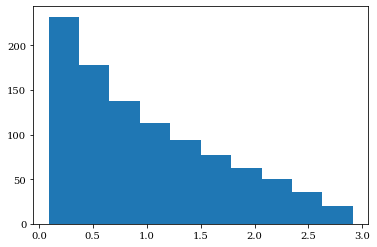

In [92]:
## Hessian 
AtA = (A.transpose()) @ A
hess = AtA + (lambd * np.identity(AtA.shape[0]))
w_hess, v_hess = np.linalg.eigh(AtA)

## Find L and mu
w, v = np.linalg.eig(hess)
L = np.max(w)
mu = min(w)

## Print L and mu
print('L :', L)
print('mu :', mu)

## Plot eigenvalues 
plt.hist(w_hess)
plt.show()

**(b)** Implement gradient descent with constant step-size $\beta = 1/L$ (as in Problem 12.2), with random initial position $x_0$. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$.

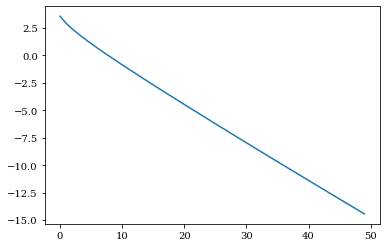

In [93]:
## Gradient descent: xt+1 = x_t - (alpha_t * gradient f(xt))
## Gradient f(x_t) = A||Ax - y|| + (lambd * ||x||)

x0 = np.random.normal(size=d)
B = 1 / L

M = ((A.transpose()) @ A) + (lambd * np.identity(AtA.shape[0]))

x_star_1 = np.linalg.inv(M)
x_star = x_star_1 @ ((A.transpose()) @ y)

def gradient_fx(x_t):
    #AtA = (A.transpose()) @ A
    AtA_x = M @ x_t #AtA @ x_t 

    At_y = (A.transpose()) @ y

    lambda_x = lambd * x_t

    return AtA_x - At_y # + lambda_x

def takeStep(x_t, B):
    new_x = x_t - (B * gradient_fx(x_t))
    return new_x

def logError(x_t):
    norm = np.linalg.norm((x_t - x_star))
    return np.log(norm)

errors = []
x_vec = x0
for i in range(0,50):
    error = logError(x_vec)
    x_vec = takeStep(x_vec, B)
    errors.append(error)

plt.plot(errors)

**(c)** Implement gradient descent with momentum, with the same parameters as in Problem 12.4. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$, on the same plot than the log-error of gradient descent without momentum.
On the same plot, plot also the lines of equation
$$
y1 = \log(1-\mu / L) \times t \qquad \text{and} \qquad
y2 = \log\Big(\frac{\sqrt{L}-\sqrt{\mu}}{\sqrt{L}+\sqrt{\mu}}\Big) \times t.
$$

(-50.0, 5.0)

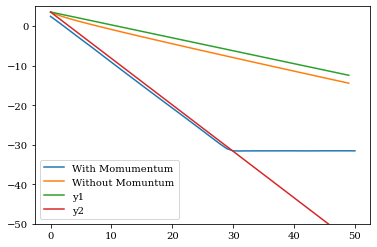

In [94]:
B = 4 / (((np.sqrt(L)) + (np.sqrt(mu))) ** 2)
G = (((np.sqrt(L)) - (np.sqrt(mu))) / ((np.sqrt(L)) + (np.sqrt(mu)))) ** 2

def takeMomentumStep(x_t, vt_minus1, B, first_run):
    negative_gradient = (-B * gradient_fx(x_t))
    
    if first_run:
        vt = negative_gradient
    else:
        momentum = G * vt_minus1
        vt = negative_gradient + momentum

    new_x = x_t + vt

    return new_x, vt

x1, v0 = takeMomentumStep(x0, 0, B, True)
errors2 = [logError(x1)]

x_val = x1
v_val = v0
y1 = []
y2 = []
for i in range(0,50):
    x_val, v_val = takeMomentumStep(x_val, v_val, B, False)
    errors2.append(logError(x_val))

    y1_val = np.log((1 - (mu / L))) * i
    y1_val = y1_val + logError(x0)
    y1.append(y1_val)

    y2_val = np.log(((np.sqrt(L)) - (np.sqrt(mu))) / ((np.sqrt(L)) + (np.sqrt(mu)))) * i
    y2_val = y2_val + logError(x0)
    y2.append(y2_val)

plt.plot(errors2, label = 'With Momumentum')
plt.plot(errors, label = 'Without Momuntum')
plt.plot(y1, label = 'y1')
plt.plot(y2, label = 'y2')
plt.legend()

ax = plt.gca()
ax.set_ylim([-50, 5])

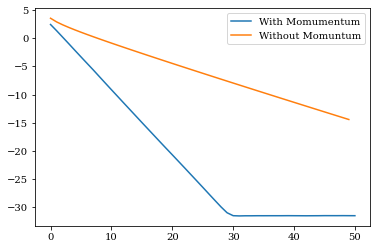

In [95]:
plt.plot(errors2, label = 'With Momumentum')
plt.plot(errors, label = 'Without Momuntum')
plt.legend()